<a href="https://colab.research.google.com/github/MatheusRocha0/Demand-Forecasting/blob/main/US_Demand_For_Gasoline_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Project: Demand Forecasting
 
## Fictional Context
 
**Disclaimer: the context I will present here is not real, the company and the CEO are all not real and only exist on my mind.**
 
I was hired by a company that sells gasoline for a consult to help them in their transition to a data-driven culture. They wanted me to help them to predict which would be the demand for gasoline in the next weeks so they could better prepare for the situation.
 
That is why in this project I am going to use Data Science concepts and technologies to forecast demand.
 
## About the Dataset
 
The dataset I will be using in this project brings informations about gasoline in United States, such as demand and production in different locations.
 
**Here is the link to download this dataset for your own purposes: https://bit.ly/3oAcrmj**

# 0.0 Preparation

## 0.1 Packages

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
 %matplotlib inline
warnings.filterwarnings("ignore")

## 0.2 Loading data

In [ ]:
df = pd.read_csv("https://github.com/MatheusRocha0/Demand-Forecasting/raw/main/Transportation_Fuels_Production_and_Demand__Beginning_1993.csv")
df.head()

,Date,East Coast Production of Gasoline (Thousand Barrels per Day),East Coast Production of Jet Fuel (Thousand Barrels per Day),U.S. Production of Gasoline (Thousand Barrels per Day),U.S. Gasoline Demand (Thousand Barrels per Day),U.S. Production of Jet Fuel (Thousand Barrels per Day)
0,10/30/2020,2914,22.0,9072,8336,919
1,10/23/2020,2986,13.0,9095,8545,840
2,10/16/2020,2909,20.0,8933,8289,782
3,10/09/2020,3030,20.0,9240,8576,749
4,10/02/2020,2864,23.0,9522,8896,799


## 0.3 Helper Functions

In [ ]:
 def mape(actual, pred):
   return np.mean(np.abs((actual - pred) / actual)) * 100

# 1.0 Data Cleaning

It is necessary to clean things from the dataset like missing values, outliers and etc because they can affect the model's performance.

## 1.1 Changing the dataset

In [ ]:
df = df[["Date", "U.S. Gasoline Demand (Thousand Barrels per Day)"]]
df.columns = ["date", "demand"]
df["date"] = pd.to_datetime(df.date)
df.set_index(df.date, inplace = True)
df.sort_index(ascending = True, inplace = True)
df.drop("date", axis = 1, inplace = True)
df.head()

,demand
date,
1993-07-16,8113
1993-07-23,7916
1993-07-30,7336
1993-08-06,8033
1993-08-13,7581


## 1.2 Treating missing values

In [ ]:
 
print("""How much missing values are there in each variable?
Variable | Missing values""")
df.isnull().sum()

How much missing values are there in each variable?
Variable | Missing values


demand    0
dtype: int64

## 1.3 Treating duplicates

In [ ]:
df.drop_duplicates(inplace = True)

 # 2.0 Data Analysis

After we treated the data it is now time to analyze the data.

## 2.1 Dataset shape

In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows: 1033
Number of columns:  1


## 2.2 Data types

In [ ]:
print("Type of variable")
df.dtypes

Type of variable


demand    int64
dtype: object

## 2.3 Dataset distribution

The Demand variable has few slow outliers

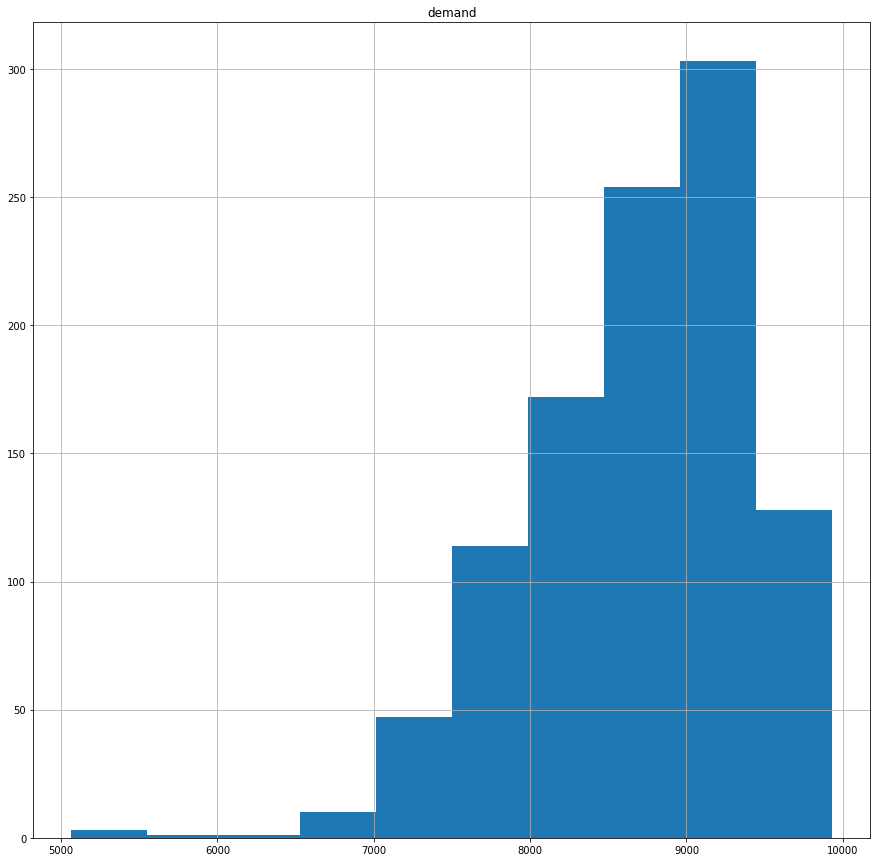

In [ ]:
df.hist(figsize = (15, 15))
plt.show()

## 2.4 Demand for gasoline over the time
 
It is possible to see that there is an outlier in the beginning of 2020 and we all know it is because of Covid-19 Pandemic.

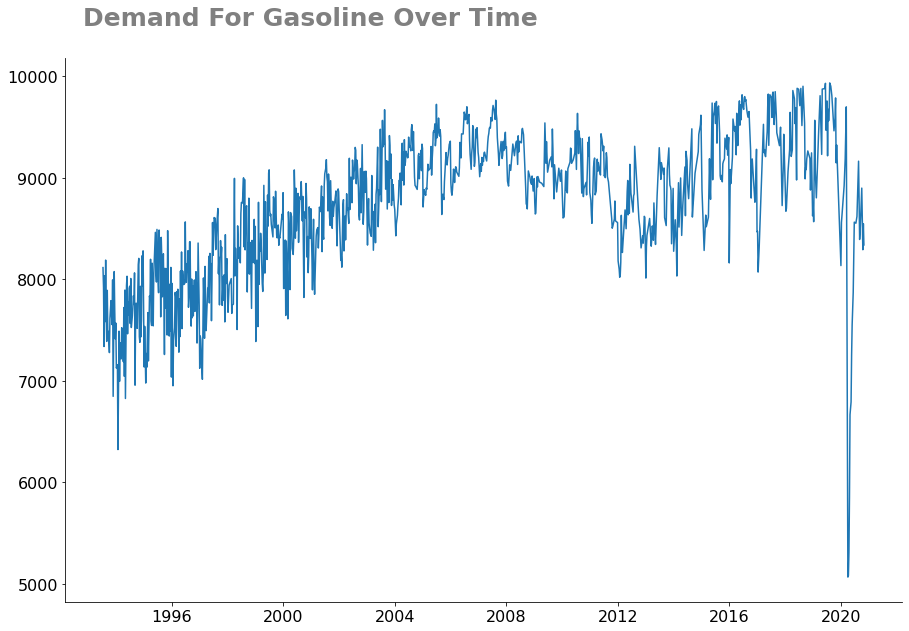

In [ ]:
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(df.index, df.demand)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
plt.text(s = "Demand For Gasoline Over Time", fontsize = 25, color = "gray", weight = "bold", x = 727500, y = 10500)
plt.show()

## 2.5 Demand grouped by year

In this chart it is possible to see the demand per year. 

The demand for gasoline grew a lot in 1994 and the period of greatest demand was between 2003 and 2008.

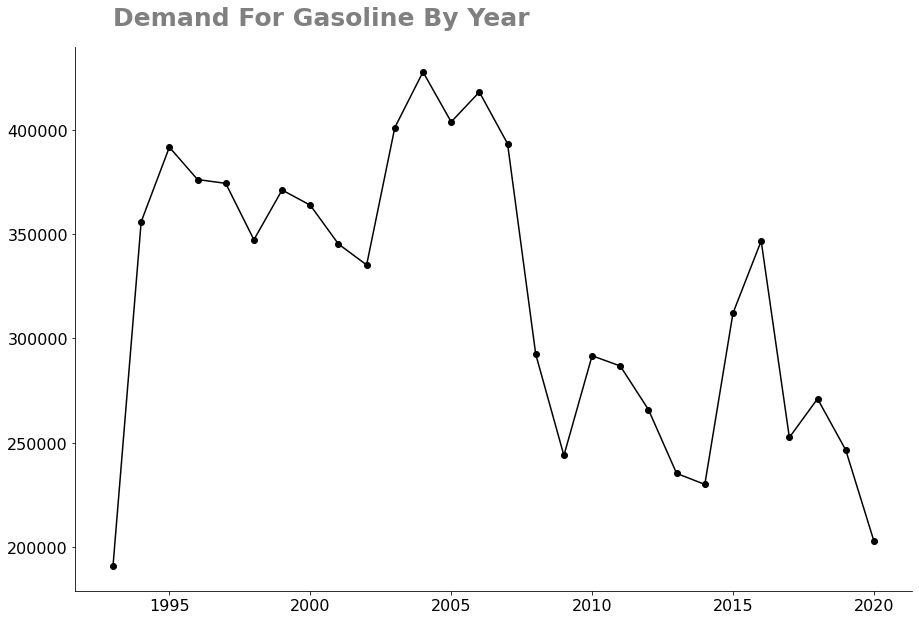

In [ ]:
gr_dt = df.groupby(df.index.year).sum()
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(gr_dt.index, gr_dt.demand, color = "black", marker = "o")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
plt.text(s = "Demand For Gasoline By Year", fontsize = 25, color = "gray", weight = "bold", x = 1993, y = 450000)
plt.show()

## 2.6 Statistics

The average demand is 8686 and its standard deviation is 705.

The demand for gasoline in the beginning of 2020 was about 5065.

The greatest demand was of 9932.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
demand,1033.0,8686.940949,707.685848,5065.0,8238.0,8812.0,9219.0,9932.0


# 3.0 Machine Learning Model

It is now time to start building our model.

## 3.1 Searching best parameters
 
ARIMA, the algorithm I will use receives 3 parameters: p, d and q.
 
As we want the best model I will try many combinations.
 
But how will I know if a model is really good? By analyzing their MAPEs. But what is MAPE?
 
**MAPE (Mean Absolute Percentage Error)**: this metric represents the percentage of error of a model, the smaller, the better.

In [ ]:
params = [
(2, 1, 1),
(3, 1, 1),
(4, 1, 1),
(5, 1, 1),
(2, 1, 2),
(3, 1, 2),
(4, 1, 3),
(5, 1, 3),
(1, 1, 4),
(2, 1, 4),
(3, 1, 4),
(4, 1, 4),
(5, 1, 4),
(10, 1, 1)
]
 
for param in params:
   try:
      model = ARIMA(df.demand, order = param).fit()
      acc = mape(df.demand, model.predict(typ = "levels"))
      print("Order: ", param, "MAPE:", acc)
   except: 
      pass

Order:  (2, 1, 1) MAPE: 2.837800858692862
Order:  (3, 1, 1) MAPE: 2.827680714848685
Order:  (4, 1, 1) MAPE: 2.8286337569428355
Order:  (5, 1, 1) MAPE: 2.866319924819052
Order:  (2, 1, 2) MAPE: 2.829836555240077
Order:  (3, 1, 2) MAPE: 2.8301617075173673
Order:  (5, 1, 3) MAPE: 2.8224762838156527
Order:  (1, 1, 4) MAPE: 2.830495480271539
Order:  (2, 1, 4) MAPE: 2.8743242641612046
Order:  (10, 1, 1) MAPE: 2.8207646856441606


The best parameters are (10, 1, 1)

 ## 3.2 Training the final model

In [ ]:
model = ARIMA(df.demand, order = (10, 1, 1)).fit()
acc = mape(df.demand, model.predict(typ = "levels"))
print("Mean Absolute Percentage Error: ", acc)

Mean Absolute Percentage Error:  2.8207646856441606


## 3.3 Actual values x Predictions
 
This chart shows a comparison between the actual values and the predictions made by the model.
 
You can notice that they are not eqaul, and it is good. It means our model is not overfitting  (when a model can not perform well in unseeen data).

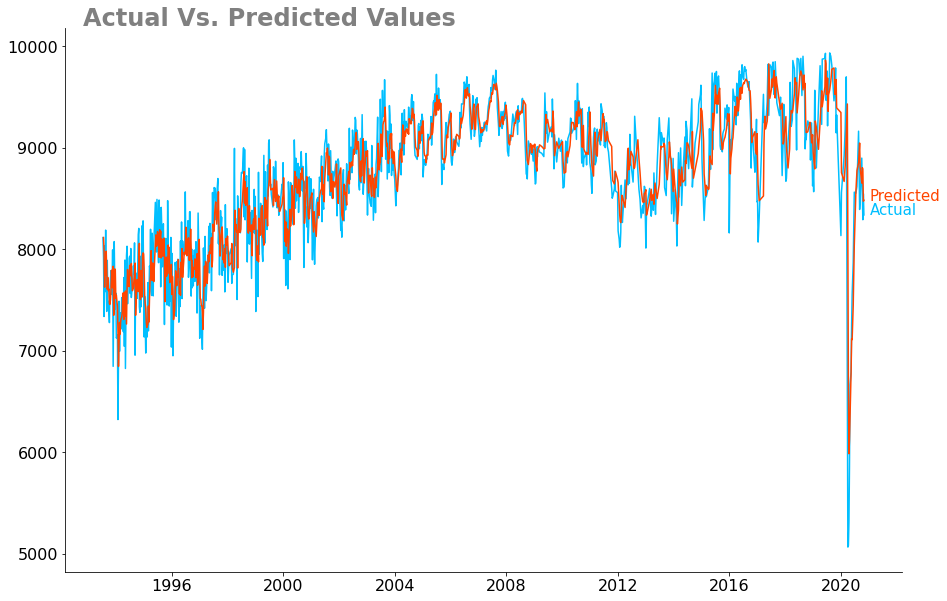

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
actual = ax.plot(df.demand, color = "deepskyblue")
pred = ax.plot(model.predict(typ = "levels"), color = "orangered")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
 
plt.text(s = "Actual Vs. Predicted Values", x = 727500, y = 10200, fontsize = 24, weight = "bold", color = "gray")
plt.text(s = "Actual", x = 737800, y = df.demand[-1], color = "deepskyblue", fontsize = 15)
plt.text(s = "Predicted", x = 737800, y = model.predict(typ = "levels")[-1], color = "orangered", fontsize = 15)
 
plt.show()

## 3.4 Forecasting
 
It is now time for forecasting, that is predict values for the next periods.
 
In statsmodels the ARIMA can perform it by using forecast(). The main parameter of this function is the number of periods in the future to predict. But it is possible to set also the *alpha* that is the Confidence Interval of the predictions.
 
**Confidence Interval**: is a range of values that describes the uncertainty surrounding an estimate. 
 
As I want to make sure to get good values I will set it as .01, that means a confidence Interval of 99%.

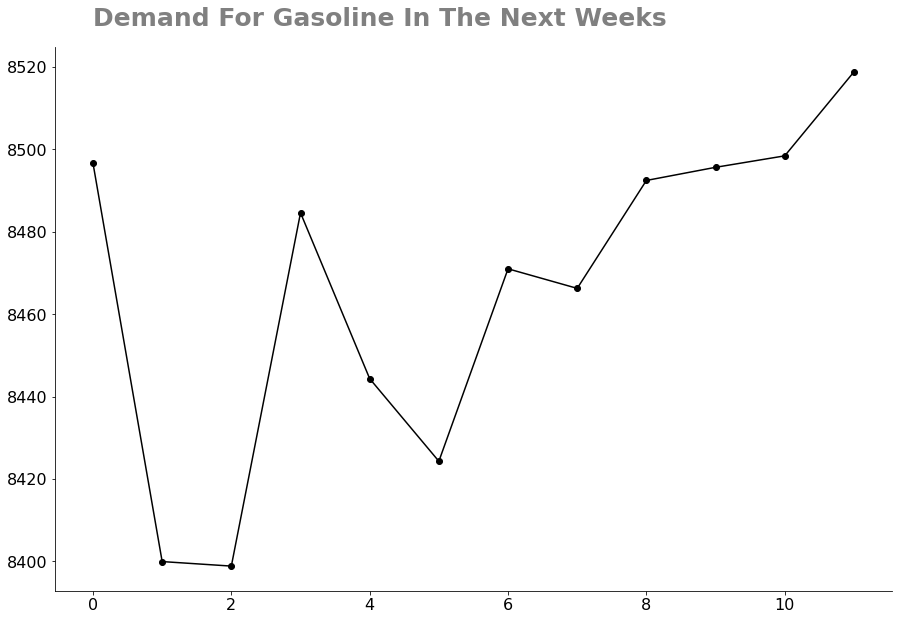

In [ ]:
forecasting = model.forecast(12, alpha = 0.01)[0]
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(forecasting, color = "black", marker = "o")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
 
plt.text(s = "Demand For Gasoline In The Next Weeks", x = 0, y = 8530, fontsize = 25, color = "gray", weight = "bold")
 
plt.show()

## 3.5 Deploy
 
In order to make the results more avaiable, I deployed this model as a Telegram Chatbot I called GasBot (@gasforecasting_bot). Anyone may access it and see the results.

The only thing you need to do is start a chat with it and enter /return and then it will return a plot with the predictions for the next weeks.

Make yourself at home to do it

# **That's All**